In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

### Import training data

In [2]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df_train = pd.read_csv('data/train.csv')
#df_train.head(100)

### Import test data

In [3]:
df_test = pd.read_csv('data/test.csv')
#df_test.head()

### EDA

### Visualize the data - target feature and input features

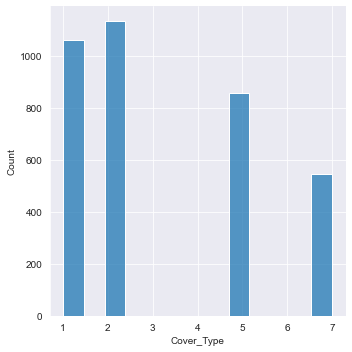

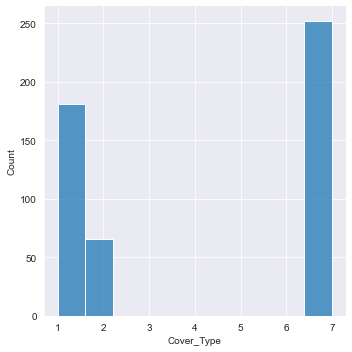

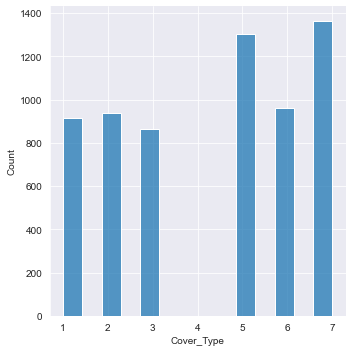

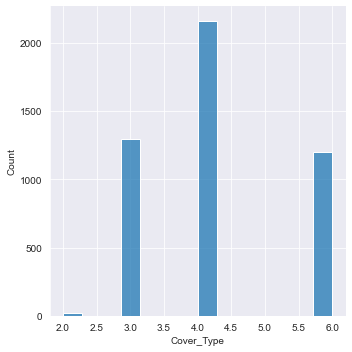

In [4]:
sns.displot(df_train[df_train['Wilderness_Area1'] == 1]['Cover_Type'],kind='hist')
sns.displot(df_train[df_train['Wilderness_Area2'] == 1]['Cover_Type'],kind='hist')
sns.displot(df_train[df_train['Wilderness_Area3'] == 1]['Cover_Type'],kind='hist')
sns.displot(df_train[df_train['Wilderness_Area4'] == 1]['Cover_Type'],kind='hist')

#### Thoughts
After visualizing the target feature based on the wilderness area, I noticed that there are cover types that are predominant to particulary areas such that when wilderness area1 has a value of one, the remaining three wilderness areas have 0 as their values. I have therefore decided to feature engineer a single column called wilderness area where I will code the wilderness areas 1-4 then set the values accordingly. e.g if for a particular row, the wilderness area1 has a value of one, then the new wilderness area column will have a value of 1, if it's wilderness area2 that has 1, the value will be 2 etc.

In [5]:
#this cell checks to confirm my findings above
#df_train[df_train["Wilderness_Area3"] == 1]

In [6]:
#the function to code the new wilderness area column
def code_wilderness_column(row):
    if row["Wilderness_Area1"] == 1 :
        return 1
    elif row["Wilderness_Area2"] == 1 :
        return 2
    elif row["Wilderness_Area3"] == 1 :
        return 3
    else:
        return 4

In [7]:
df_train["Wilderness_Area"] = df_train.apply (lambda row: code_wilderness_column(row), axis=1)

Now I want to query this further by ploting the cover type setting the wilderness area as the hue.

From my plot below, I found out that:
- Cover types 1,2,5 & 7 can be found in wilderness area 1
- Cover types 1,2 & 7 can be found in wilderness area 2
- Cover types 1,2,3,5, 6 & 7 can be found in wilderness area 3
- Cover types 2,3, 4 & 6 can be found in wilderness area 4.
- Cover type 4 can only be found in wilderness area 4

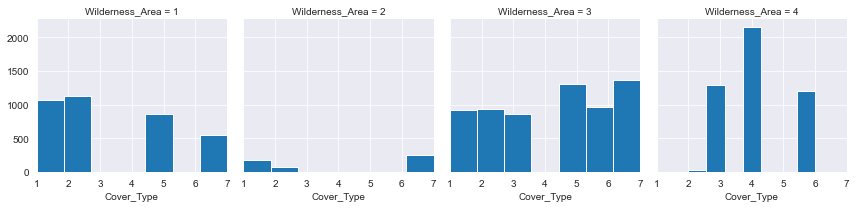

In [8]:

g = sns.FacetGrid(data=df_train,col='Wilderness_Area',xlim=(1,7))
g.map(plt.hist,'Cover_Type', bins= 7)

Now I will drop the old wilderness areas 1-4 as I won't be using them for my analysis

In [9]:
df_train = df_train.drop(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'], axis=1)

In [10]:
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type', 'Wilderness_Area'],
      dtype='object')

In [11]:
df_train['Hillshade_Noon'].corr(df_train['Hillshade_9am'])

-0.013712384460790107

#### Check for correlation between target and other features

In [12]:
df_train.corr()['Cover_Type']

Id                                    0.108363
Elevation                             0.016090
Aspect                                0.008015
Slope                                 0.087722
Horizontal_Distance_To_Hydrology     -0.010515
Vertical_Distance_To_Hydrology        0.075647
Horizontal_Distance_To_Roadways      -0.105662
Hillshade_9am                        -0.010286
Hillshade_Noon                       -0.098905
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Soil_Type1                            0.015069
Soil_Type2                            0.022627
Soil_Type3                           -0.016393
Soil_Type4                           -0.027816
Soil_Type5                            0.027692
Soil_Type6                            0.006521
Soil_Type7                                 NaN
Soil_Type8                           -0.008133
Soil_Type9                           -0.027012
Soil_Type10                           0.128972
Soil_Type11  

### Personal thoughts
After doing the basic checks and noting that the dataset has no null values, I also checked for the correlation of the target feature (Cover_Type) with other feautures. Nothing that most of the features are negatively corelated with the target and also that soil types 7 and 15 returns NaN because these columns have 0 as values althrough.

### Choice of algorithm - Random Forest
I settled for random forest because after running other algorithms, it performed better.

### Random forests

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train = df_train.drop('Id', axis=1)
X = df_train.drop('Cover_Type',axis=1)
y = df_train['Cover_Type']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [17]:
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000]
}

In [18]:
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1)


In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 1000]})

In [20]:
grid_search.best_params_

{'n_estimators': 300}

In [21]:
rfc = RandomForestClassifier(n_estimators=300)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test,rfc_pred))

[[488  95   1   0  13   4  48]
 [124 423  10   0  52  20   7]
 [  0   1 537  28  10  95   0]
 [  0   0  10 611   0   8   0]
 [  6  16  12   0 608   6   0]
 [  0   3  55  17   3 567   0]
 [ 20   1   0   0   0   0 637]]


In [25]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.76      0.75      0.76       649
           2       0.78      0.67      0.72       636
           3       0.86      0.80      0.83       671
           4       0.93      0.97      0.95       629
           5       0.89      0.94      0.91       648
           6       0.81      0.88      0.84       645
           7       0.92      0.97      0.94       658

    accuracy                           0.85      4536
   macro avg       0.85      0.85      0.85      4536
weighted avg       0.85      0.85      0.85      4536



#### Using the test dataset provided to make predictions

In [26]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# I forgot drop the id
df_test = df_test.drop('Id', axis=1)

In [28]:
df_test["Wilderness_Area"] = df_test.apply (lambda row: code_wilderness_column(row), axis=1)

In [29]:
df_test = df_test.drop(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'], axis=1)

In [30]:
df_test.shape

(565892, 51)

In [31]:
rfc_pred = rfc.predict(df_test)

In [32]:
rfc_pred

array([2, 2, 2, ..., 3, 6, 3], dtype=int64)

To confirm, I printed out the wilderness area of the first row of my test dataset and it returned one. From my training data above, I confirmed that the cover type 2 (the first prediction in my prediction array) can be found in this wilderness area.

In [33]:
print(f'The cover type of this location in wilderness area {df_test.loc[0]["Wilderness_Area"]} is {rfc_pred[0]}')

The cover type of this location in wilderness area 1 is 2


### Pickle my model for future use and sharing

In [34]:
import pickle

In [35]:
pickle.dump(rfc, open('newrfc_model.pkl','wb'))

### Loading my pickled model to confirm

In [36]:
model = pickle.load(open('newrfc_model.pkl','rb'))

In [37]:
print(model.predict(df_test.loc[40].to_numpy().reshape(1,-1)))

[2]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
